# Análise

- Ver quais bairros tem mais atendimentos concluídos [x]
- Ver a quantidade de chamados por época do ano [x]
- Criar graficos com matplotlib [x]

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

chamados = pd.read_csv('chamados-preprocessados.csv', sep=",", index_col=0)

/tmp/ipykernel_5449/2878490328.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  chamados = pd.read_csv('chamados-preprocessados.csv', sep=",", index_col=0)


# Quantidade de chamados por ano

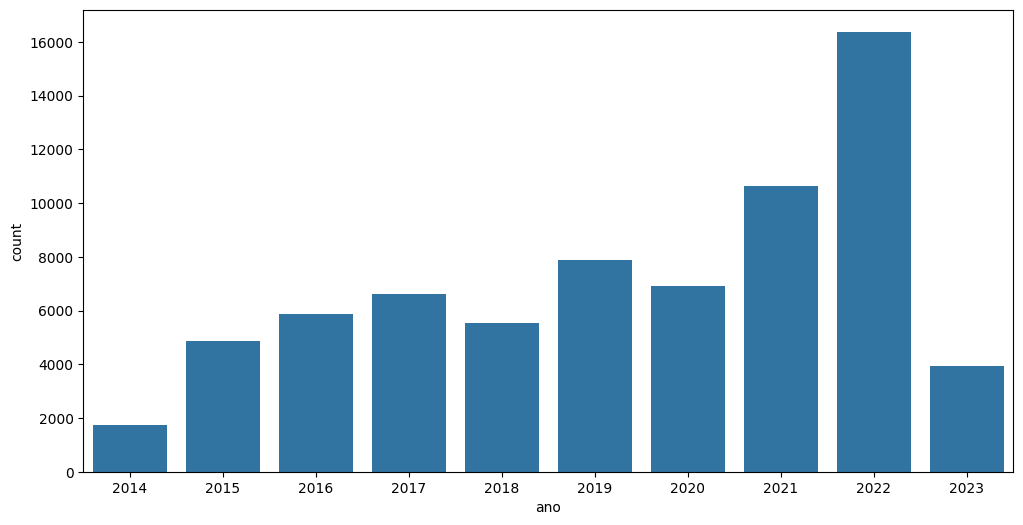

In [2]:
plt.figure(figsize=(12,6))
sns.countplot(x='ano', data=chamados)
plt.savefig('imagens/chamados_por_ano.jpg', dpi=250)
plt.show()

# Quantidade de chamados por mes

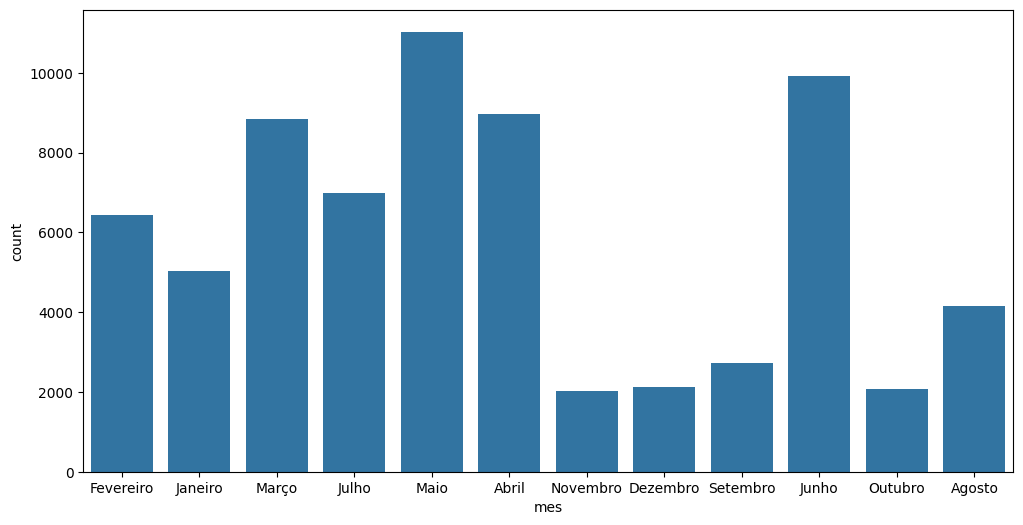

In [3]:
fig = plt.figure(figsize=(12,6))
sns.countplot(x='mes', data=chamados)
plt.savefig('imagens/chamados_por_mes.jpg', dpi=250)
plt.show()

# Quantidade de chamados concluidos por bairro

In [4]:
# Separar os que estão concluidos
chamados_concluidos = chamados.query('processo_situacao == "completo"').groupby(['solicitacao_bairro'], as_index=False).count()

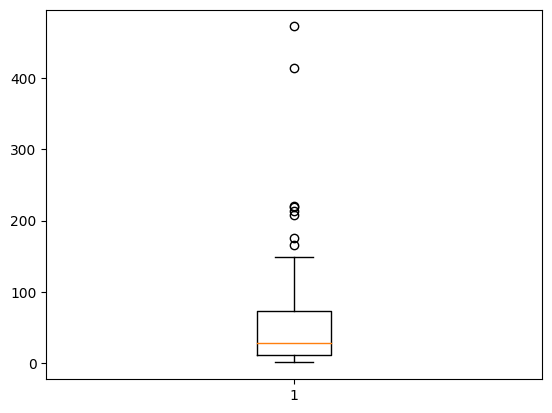

In [5]:
# Criar grafico boxplot
plt.boxplot(chamados_concluidos['solicitacao_data'])
plt.savefig('imagens/boxplot_bairros.jpg', dpi=250)
plt.show()

### 5 bairros com mais chamados concluidos

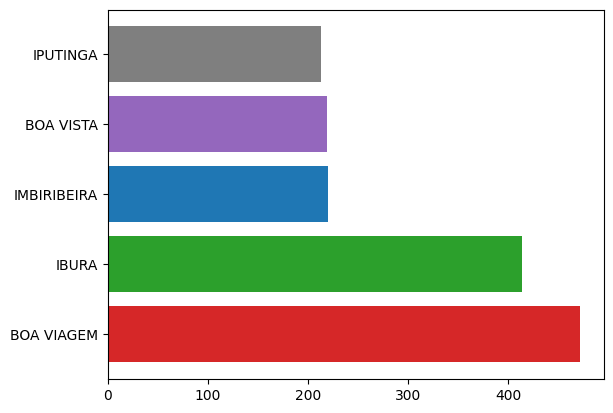

In [6]:
cores = ['tab:red', 'tab:green', 'tab:blue', 'tab:purple', 'tab:grey']

# Pegar os bairros com mais chamados concluidos
bairros_mais_chamados = chamados_concluidos.sort_values(by=['solicitacao_data'], ascending=False).head(5)

# Mostrar num grafico
plt.barh(bairros_mais_chamados['solicitacao_bairro'], bairros_mais_chamados['solicitacao_data'], color=cores)
plt.savefig('imagens/bairros_mais_chamados_concluidos.jpg', bbox_inches='tight', dpi=250)
plt.show()

## 5 bairros com menos chamados concluidos

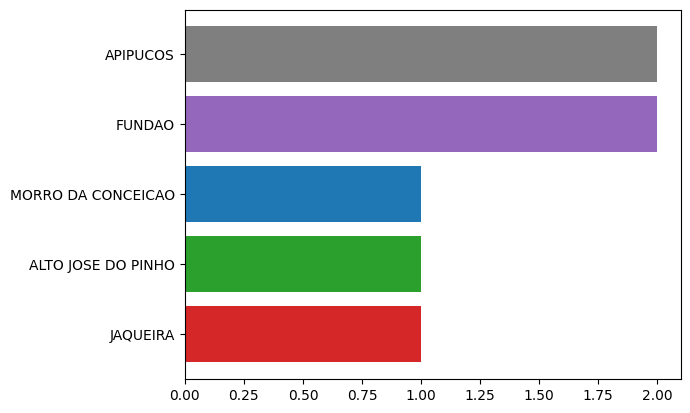

In [7]:
cores = ['tab:red', 'tab:green', 'tab:blue', 'tab:purple', 'tab:grey']

# Pegar os bairros com meno chamados concluidos
bairros_menos_chamados = chamados_concluidos.sort_values(by=['solicitacao_data'], ascending=True).head(5)

# Criar grafico
plt.barh(bairros_menos_chamados['solicitacao_bairro'], bairros_menos_chamados['solicitacao_data'], color=cores)
plt.savefig('imagens/bairros_menos_chamados_concluidos.jpg', bbox_inches='tight', dpi=250)
plt.show()